# Practica 2: Estadistica descriptiva

## Estructuras de datos en Pandas

**Series**. Las series de Pandas son vectores similares a los arrays de NumPy, que podemos indexar usando etiquetas.

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obj = pd.Series([7,4,-5,3])

In [3]:
display(obj) # muestra el obj de tipo pd.Series

0    7
1    4
2   -5
3    3
dtype: int64

In [4]:
display(obj.array) # devuelve la serie como numpy.array

<NumpyExtensionArray>
[np.int64(7), np.int64(4), np.int64(-5), np.int64(3)]
Length: 4, dtype: int64

In [5]:
display(obj.index) # devuelve los indices

RangeIndex(start=0, stop=4, step=1)

In [6]:
obj2 = pd.Series([np.pi, 0, -2, 1.41], index = ["d","b","c","a"])
display(obj2)

d    3.141593
b    0.000000
c   -2.000000
a    1.410000
dtype: float64

In [7]:
display(obj2.array)

<NumpyExtensionArray>
[np.float64(3.141592653589793),               np.float64(0.0),
              np.float64(-2.0),              np.float64(1.41)]
Length: 4, dtype: float64

In [8]:
display(obj2.index)

Index(['d', 'b', 'c', 'a'], dtype='object')

In [9]:
obj2["a"] # retorna elemento de index "a"

np.float64(1.41)

In [10]:
obj2[3] # retorna elemento en posicion 3

/tmp/ipykernel_32250/1634318951.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obj2[3] # retorna elemento en posicion 3


np.float64(1.41)

In [11]:
obj2[1:3] # devuelve los elementos con indice i = [1,3)

b    0.0
c   -2.0
dtype: float64

In [12]:
obj3 = obj2[["a","b"]]
obj3

a    1.41
b    0.00
dtype: float64

In [13]:
obj3.index

Index(['a', 'b'], dtype='object')

In [14]:
# Las operaciones a pd.Series son componente a componente
np.exp(obj2) # todos los elementos de obj2 como exponente natural

d    23.140693
b     1.000000
c     0.135335
a     4.095955
dtype: float64

**Metodos de series**. Ejecutar los siguientes comandos e interpretar que hace cada uno.

In [15]:
series1 = pd.Series(["a","b","c","b","a","c","c","x"])

# check whether elements in Series are contained in `values`.
series1.isin(["b","c"])

0    False
1     True
2     True
3     True
4    False
5     True
6     True
7    False
dtype: bool

In [16]:
series1.value_counts() # cantidad de apariciones de cada elemento 

c    3
a    2
b    2
x    1
Name: count, dtype: int64

**DataFrames**. Un DataFrame es una representación de los datos en formato de tabla donde las columnas son vectores del mismo tamaño. Como cada columna es un vector, cada columna puede contener datos de un único tipo. Se pueden pensar como variables. Cada variable corresponde a una
serie de Pandas, y todas las series de un mismo DataFrame están indexadas por los mismos ı́ndices.

Una forma de crear un DataFrame es utilizando un “diccionario”. Todas las variables del
diccionario deben ser vectores o listas de la misma longitud

In [17]:
data = { "nombre" : [ "Rodrigo" , "Sergio" , "Cristina" , "Diana" ] , "altura" :
np.array ([178 , 172 , 175 , 168]) , "peso" : np . array ([81.2 , 76.1 , 68.5 ,
64.0]) }
display (data)

{'nombre': ['Rodrigo', 'Sergio', 'Cristina', 'Diana'],
 'altura': array([178, 172, 175, 168]),
 'peso': array([81.2, 76.1, 68.5, 64. ])}

In [18]:
pacientes = pd.DataFrame(data).set_index("nombre")
pacientes

,altura,peso
nombre,,
Rodrigo,178,81.2
Sergio,172,76.1
Cristina,175,68.5
Diana,168,64.0


 ¿Cuál es la clase del objeto pacientes? ¿Cuál es la clase de cada uno de los vectores columna?
(para saber la clase de un objeto, utilizar el comando type, para saber el tipo de datos de un
array de numpy, utilizar np.dtype)

In [19]:
type(pacientes) # tipo de objeto 

pandas.core.frame.DataFrame

In [20]:
type(pacientes.altura) # tipo de columnas

pandas.core.series.Series

 Guardar en una variable nueva el vector columna altura. Pueden utilizar pacientes["altura"]
o pacientes.altura (la primera opción es preferible, la segunda puede dar error si el nombre
coincide con alguna función ya existente).


In [21]:
alturas = pacientes["altura"]

A diferencia de las matrices en Numpy, un DataFrame de Pandas es un conjunto de columnas,
no de filas. 

In [23]:
pacientes["altura"].Rodrigo

np.int64(178)

**Gapminder**. A modo de ejemplo, vamos a explorar el DataFrame gapminder que contiene
datos poblacionales y de desarrollo humano de distintos paı́ses a lo largo del tiempo.

In [25]:
pip install gapminder

Note: you may need to restart the kernel to use updated packages.


In [1]:
from gapminder import gapminder

In [3]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [4]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [5]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
gapminder.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


¿De qué clase es el objeto gapminder? ¿Qué variables tiene el DataFrame gapminder y de qué
clase son? ¿Qué ı́ndices usa?

In [8]:
type(gapminder) # es un dataFrame

pandas.core.frame.DataFrame

In [13]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [15]:
gapminder.index

RangeIndex(start=0, stop=1704, step=1)

 Explorar el tamaño del DataFrame gapminder usando la función shape.

In [16]:
gapminder.shape

(1704, 6)

¿De cuántos paı́ses hay datos? Ayuda: averiguar qué hacen los métodos `unique()` y `nunique()`
aplicados a series.

In [18]:
gapminder.set_index("country")

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
Afghanistan,Asia,1952,28.801,8425333,779.445314
Afghanistan,Asia,1957,30.332,9240934,820.853030
Afghanistan,Asia,1962,31.997,10267083,853.100710
Afghanistan,Asia,1967,34.020,11537966,836.197138
Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...
Zimbabwe,Africa,1987,62.351,9216418,706.157306
Zimbabwe,Africa,1992,60.377,10704340,693.420786
Zimbabwe,Africa,1997,46.809,11404948,792.449960


In [24]:
paises = gapminder["country"]
paises.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [25]:
paises.nunique()

142

Extraer la información de Argentina, Uruguay y Chile y guardarla en un nuevo DataFrame
`gm_sur`. Sugerencia: recordar el método `isin()`.
¿Cuántas filas tiene? ¿Cuál es el primer y el último año para el cuál existen datos de Argentina
en gapminder?

In [53]:
gm_sur = gapminder.set_index("country").loc[["Argentina", "Chile","Uruguay"]]
print("Cantidad de filas de gm_sur: ", gm_sur.shape[0])
print("Primer año registrado para Argentina: ", gm_sur["year"].loc["Argentina"].iloc[0])
print("Ultimo año registrado para Argentina: ", gm_sur["year"].loc["Argentina"].iloc[-1])

Cantidad de filas de gm_sur:  36
Primer año registrado para Argentina:  1952
Ultimo año registrado para Argentina:  2007


## Archivos de datos

La biblioteca Pandas nos permite también trabajar con archivos de datos.
1. Leer el archivo `casos_coronavirus.csv`
3. Graficar la curva de casos por dı́a.
4. Graficar la curva de casos acumulados (utilizar la función cum_sum para calcularlos)
5. Definir $y$ como el logaritmo de la cantidad de casos acumulados y graficar $y$ en función de
la cantidad de dı́as transcurridos.

In [56]:
df = pd.read_csv("../../datasets/casos_coronavirus.csv") # str -> DataFrame
df

,fecha,confirmados_Nuevos
0,3-3-2020,1
1,4-3-2020,0
2,5-3-2020,1
3,6-3-2020,6
4,7-3-2020,0
...,...,...
91,2-6-2020,904
92,3-6-2020,949
93,4-6-2020,929
94,5-6-2020,840


<Axes: >

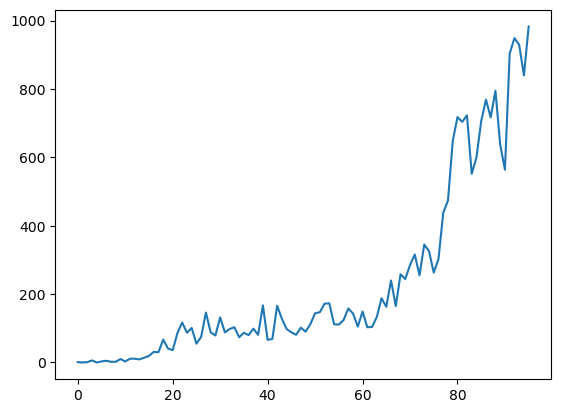

In [57]:
df["confirmados_Nuevos"].plot()

<Axes: >

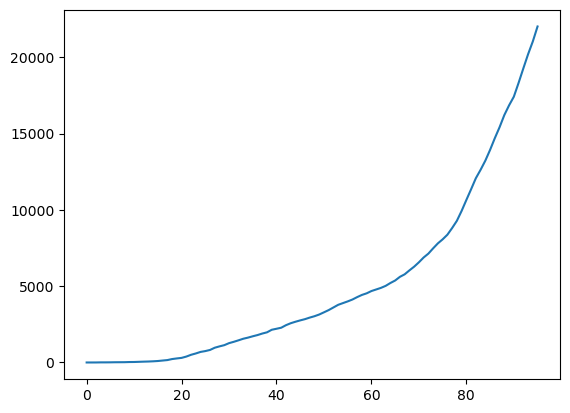

In [59]:
df["confirmados_Nuevos"].cumsum().plot()

<Axes: >

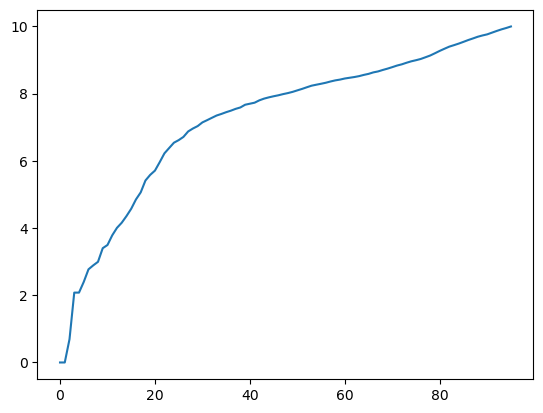

In [60]:
y = np.log(df["confirmados_Nuevos"].cumsum())
y.plot()

## Estadistica descriptiva

 En el DataFrame **gapminder**, una de las variables es el producto bruto per capita de los paı́ses
(gdpPercap). ¿Es una variable categórica (nominal u ordinal) o numérica (discreta o continua)?

Veamos que tipo de dato tiene la columna:

In [63]:
gapminder["gdpPercap"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1704 entries, 0 to 1703
Series name: gdpPercap
Non-Null Count  Dtype  
--------------  -----  
1704 non-null   float64
dtypes: float64(1)
memory usage: 13.4 KB


Todos los elementos son numeros de punto flotante. Entonces gdpPerCap es una variable numerica continua.

 Supongamos que definimos una nueva variable que puede tomar los siguientes valores:
$$
nivelGDP = \begin{cases} 
0, & \text{si } gdpPercap < 1600, \\
1, & \text{si } 1600 \leq gdpPercap < 6600, \\
2, & \text{en otro caso.}
\end{cases}
$$
¿La nueva variable es categórica (nominal u ordinal) o numérica (discreta o continua)? ¿Cambia
la respuesta si la variable toma valores “bajo”, “medio” y “alto” en lugar de 0, 1, 2?

Ahora la variable es numerica discreta. Si tomase valores que no son numeros como los que menciona arriba, entonces pasaria a ser una variable categorica ordinal, ya que habria un orden intrinseco.

 Filtrar el DataFrame de `gapminder` para el año 2007. Luego, para ese año, calcular la cantidad
de paı́ses en cada continente. Explorar la función `groupBy()` y los métodos `size` y `nunique()`
de un DataFrame agrupado.

In [84]:
gm_2007 = gapminder[gapminder["year"] == 2007]
gm_2007.nunique()

country      142
continent      5
year           1
lifeExp      142
pop          142
gdpPercap    142
dtype: int64

In [88]:
gm_2007.size # shape[0]*shape[1]

852

Con el mismo filtro que el ejercicio anterior (es decir, sólo para el año 2007), crear una variable $gdpAlto$ que valga 1 si `gdpPercap` es mayor que 2000 dólares y 0 si no lo es. Luego crear una
tabla de 2 filas y 5 columnas que calcule la cantidad de paı́ses donde $gdpAlto$ = 0 o $gdpAlto$ = 1
en cada continente.

In [138]:
"""

Continente    value_counts
America       ....
Asia          ....
Europa
...

"""

'\n\nContinente    value_counts\nAmerica       ....\nAsia          ....\nEuropa\n...\n\n'

In [153]:
gm_2007[gm_2007["continent"] == "Oceania"]

,country,continent,year,lifeExp,pop,gdpPercap
71,Australia,Oceania,2007,81.235,20434176,34435.36744
1103,New Zealand,Oceania,2007,80.204,4115771,25185.00911


In [157]:
gdpAlto = gm_2007.set_index("continent")["gdpPercap"].ge(2000).astype(int)
gdpAlto.groupby("continent").value_counts()

# preguntar, se que esta mal pero la idea esta... si solo pudiera trasponer...

continent  gdpPercap
Africa     0            33
           1            19
Americas   1            24
           0             1
Asia       1            27
           0             6
Europe     1            30
Oceania    1             2
Name: count, dtype: int64

Definir funciones que calculen la media y mediana de un vector de valores numéricos.

In [173]:
def media(x: np.ndarray) -> np.float64:
    return round(np.mean(x),2)

def mediana(x: np.ndarray) -> np.float64:
    return round(np.median(x), 2)

Probar las funciones definidas con las variables numéricas utilizando solo los datos del año
2007.

In [255]:
gdpPerCap = gm_2007["gdpPercap"]
lifeExp = gm_2007["lifeExp"]
pop = gm_2007["pop"]

print("Media GDP per capita global en 2007: ", media(gdpPerCap.array))   
print("Mediana GDP per capita global en 2007: ", mediana(gdpPerCap.array), "\n")    

print("Media de expectativa de vida global en 2007: ", media(lifeExp.array))  
print("Mediana de expectativa de vida en 2007: ", mediana(lifeExp.array), "\n")    

print("Media poblacion global en 2007: ", media(pop.array))    
print("Mediana poblacion global en 2007: ", mediana(pop.array))    

Media GDP per capita global en 2007:  11680.07
Mediana GDP per capita global en 2007:  6124.37 

Media de expectativa de vida global en 2007:  67.01
Mediana de expectativa de vida en 2007:  71.94 

Media poblacion global en 2007:  44021219.57
Mediana poblacion global en 2007:  10517531.0


 Graficar el producto bruto interno promedio en América en función del año.
 

Text(0, 0.5, 'PBI')

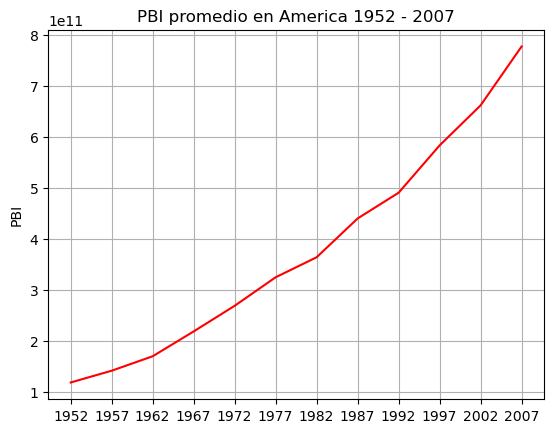

In [268]:
years = gapminder["year"].unique()
means = []
gm_americas = gapminder[gapminder["continent"] == "Americas"].sort_values("year")
for year in years: # un poco de magia de ciclos
    gm_americas0 = gm_americas[gm_americas["year"] == year] 
    means.append(media(gm_americas0["pop"]*gm_americas0["gdpPercap"])) # PBI = PBI Per Capita * Pooblacion

plt.grid()
plt.title("PBI promedio en America 1952 - 2007")
plt.plot(years, means, 'red')
plt.xticks(years)
plt.ylabel("PBI")

Definir desvı́o estándar. ¿Por qué las diferencias en el numerador están elevada al cuadrado?
Escribir una función de Python que calcule el desvı́o estándar. Comparar el resultado de usar
la función np.std().

El desvio estandar se define como: $$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}$$
Asumo que se eleva al cuadrado por dos motivos:
1. Queremos que $\sigma^2 \geq 0$ pues estamos trabajando con una raiz cuadrada
2. Queremos desatacar los errores y minimizar los datos cercanos a la media

In [307]:
def desvest(x: np.ndarray) -> np.float64:
    mu = np.mean(x)
    sq_dif = (x - mu)**2
    res = np.sqrt(np.mean(sq_dif))
    return round(res, 3)

# Ejemplo
x = [1,2,3,4,5]
abs(desvest(x) - np.std(x)) # esta bien qcyo

np.float64(0.00021356237309522186)

Calcular el mı́nimo, el máximo y el desvı́o estandar de la expectativa de vida (lifeExp) entre
paı́ses tomando sólo el DataFrame gapminder para el año 2007.

In [308]:
print("Minima expectativa de vida en 2007: ", min(gm_2007["lifeExp"]))
print("Maxima expectativa de vida en 2007: ",max(gm_2007["lifeExp"]))
print("Desvio estandar de la expectativa de vida: ",desvest(gm_2007["lifeExp"]))

Minima expectativa de vida en 2007:  39.613
Maxima expectativa de vida en 2007:  82.603
Desvio estandar de la expectativa de vida:  12.03
